In [1]:
!pip install -q keras


In [2]:
!pip install -q matplotlib-venn


In [3]:
!pip show tensorflow

Name: tensorflow
Version: 2.7.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: /usr/local/lib/python3.7/dist-packages
Requires: google-pasta, tensorflow-estimator, absl-py, libclang, flatbuffers, keras, grpcio, wrapt, opt-einsum, typing-extensions, tensorboard, keras-preprocessing, termcolor, wheel, protobuf, numpy, astunparse, gast, tensorflow-io-gcs-filesystem, six, h5py
Required-by: kapre


In [4]:
!pip install -q tensorflow

In [5]:
!apt-get install -y software-properties-common

Reading package lists... Done
Building dependency tree       
Reading state information... Done
software-properties-common is already the newest version (0.96.24.32.18).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.


In [6]:
!apt-get install -y -qq software-properties-common python-software-properties module-init-tools
!add-apt-repository -y ppa:alessandro-strada/ppa 2>&1 > /dev/null
!apt-get update -qq 2>&1 > /dev/null
!apt-get -y install -qq google-drive-ocamlfuse fuse
from google.colab import auth
auth.authenticate_user()
from oauth2client.client import GoogleCredentials
creds = GoogleCredentials.get_application_default()
import getpass
!google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret} < /dev/null 2>&1 | grep URL
vcode = getpass.getpass()
!echo {vcode} | google-drive-ocamlfuse -headless -id={creds.client_id} -secret={creds.client_secret}


E: Package 'python-software-properties' has no installation candidate
Selecting previously unselected package google-drive-ocamlfuse.
(Reading database ... 155222 files and directories currently installed.)
Preparing to unpack .../google-drive-ocamlfuse_0.7.27-0ubuntu1~ubuntu18.04.1_amd64.deb ...
Unpacking google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Setting up google-drive-ocamlfuse (0.7.27-0ubuntu1~ubuntu18.04.1) ...
Processing triggers for man-db (2.8.3-2ubuntu0.1) ...
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive&response_type=code&access_type=offline&approval_prompt=force
··········
Please, open the following URL in a web browser: https://accounts.google.com/o/oauth2/auth?client_id=32555940559.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope

In [7]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [8]:
!ls "/content/drive/My Drive/Dataset"

Test  Train  Validation


In [9]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [10]:
%cp -R /content/drive/MyDrive/Dataset/ /content/

In [11]:
!ls "/content/Dataset"

Test  Train  Validation


In [12]:
num_nonmasked_tr = len(os.listdir('/content/Dataset/Train/Non Mask'))
num_masked_tr = len(os.listdir('/content/Dataset/Train/Mask'))

num_nonmasked_val = len(os.listdir('/content/Dataset/Validation/Non Mask'))
num_masked_val = len(os.listdir('/content/Dataset/Validation/Mask'))

total_train = num_nonmasked_tr + num_masked_tr
total_val = num_nonmasked_val + num_masked_val

In [13]:
print('total training Nonmasked images:', num_nonmasked_tr)
print('total training masked images:', num_masked_tr)

print('total validation Nonmasked images:', num_nonmasked_val)
print('total validation masked images:', num_masked_val)

print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Nonmasked images: 300
total training masked images: 300
total validation Nonmasked images: 153
total validation masked images: 153
Total training images: 600
Total validation images: 306


In [14]:
BATCH_SIZE = 100  # Number of training examples to process before updating our models variables
IMG_SHAPE  = 120  # Our training data consists of images with width of 120 pixels and height of 150 pixels

In [15]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [16]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory='/content/Dataset/Train',
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(120,120)
                                                           class_mode='binary')

Found 600 images belonging to 2 classes.


In [17]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                              directory='/content/Dataset/Validation',
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 306 images belonging to 2 classes.


In [18]:
sample_training_images, _ = next(train_data_gen) 

In [19]:
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

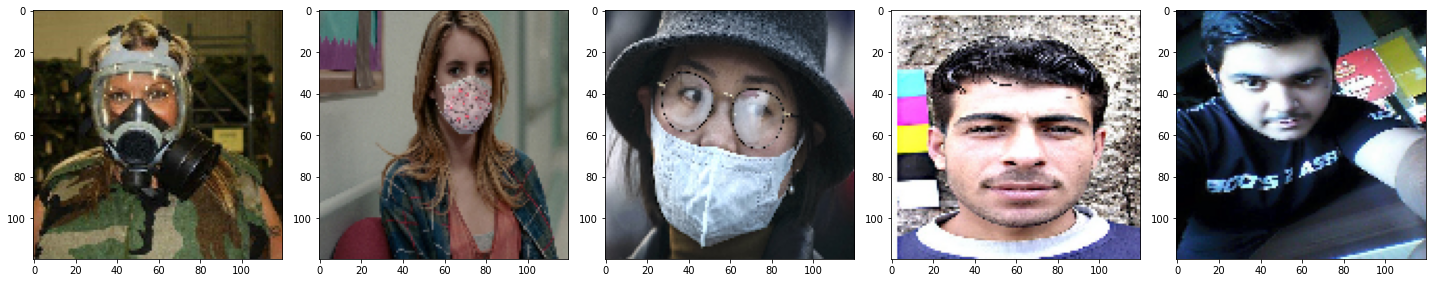

In [20]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [21]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Dataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 600 images belonging to 2 classes.


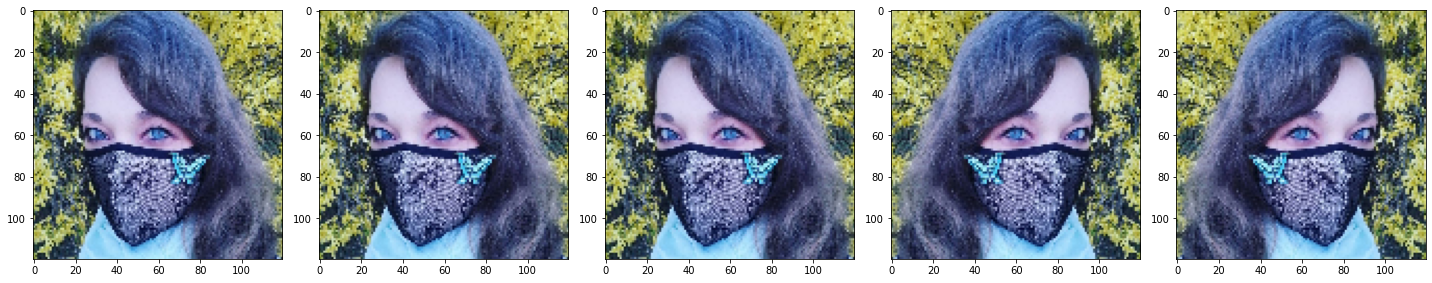

In [22]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [23]:
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Dataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 600 images belonging to 2 classes.


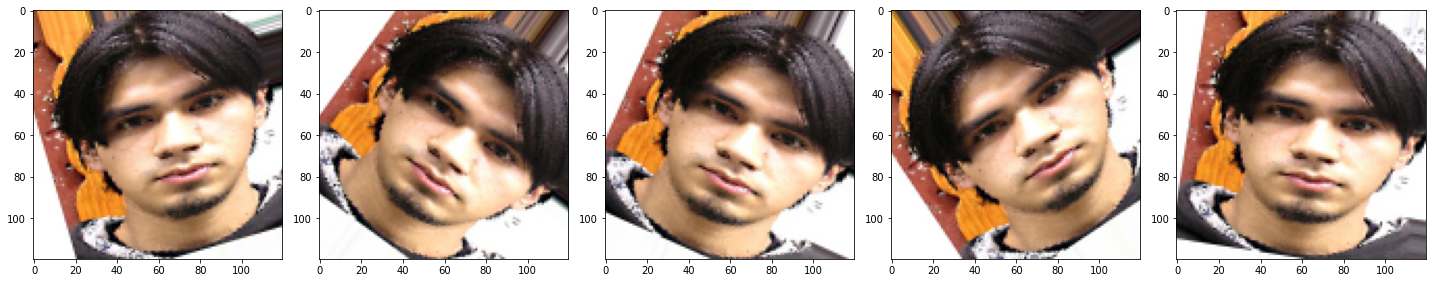

In [24]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [25]:
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/Dataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 600 images belonging to 2 classes.


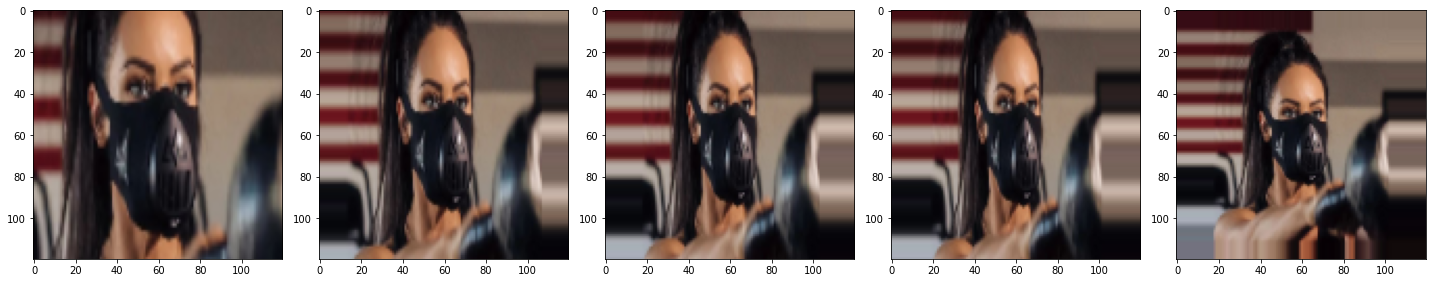

In [26]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [27]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory='/content/Dataset/Train',
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 600 images belonging to 2 classes.


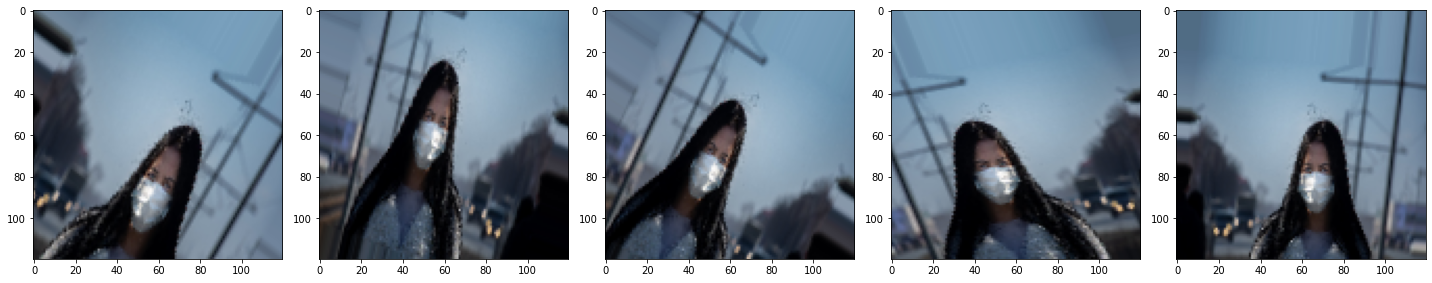

In [28]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [29]:
image_gen_val = ImageDataGenerator(rescale=1./255)

val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory='/content/Dataset/Validation',
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 306 images belonging to 2 classes.


In [30]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
    #tf.keras.layers.Dense(2, activation='softmax')
    #tf.keras.layers.Dense(1, activation='sigmoid')
])

In [31]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [32]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 59, 59, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 28, 28, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 13, 13, 128)      0

In [34]:
EPOCHS = 30
history = model.fit_generator(
    train_data_gen,
    steps_per_epoch=int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps=int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/30
6/6 [==============================] - 21s 4s/step - loss: 0.3767 - accuracy: 0.8433 - val_loss: 0.3300 - val_accuracy: 0.8497
Epoch 2/30
6/6 [==============================] - 21s 4s/step - loss: 0.3665 - accuracy: 0.8350 - val_loss: 0.4123 - val_accuracy: 0.8235
Epoch 3/30
6/6 [==============================] - 21s 4s/step - loss: 0.4321 - accuracy: 0.8267 - val_loss: 0.3121 - val_accuracy: 0.8791
Epoch 4/30
6/6 [==============================] - 21s 3s/step - loss: 0.3350 - accuracy: 0.8683 - val_loss: 0.2771 - val_accuracy: 0.9052
Epoch 5/30
6/6 [==============================] - 21s 4s/step - loss: 0.3104 - accuracy: 0.8767 - val_loss: 0.2645 - val_accuracy: 0.9118
Epoch 6/30
6/6 [==============================] - 21s 4s/step - loss: 0.3033 - accuracy: 0.8800 - val_loss: 0.2587 - val_accuracy: 0.8987
Epoch 7/30
6/6 [==============================] - 21s 3s/step - loss: 0.3107 - accuracy: 0.8833 - val_loss: 0.2871 - val_accuracy: 0.8758
Epoch 8/30
6/6 [==================

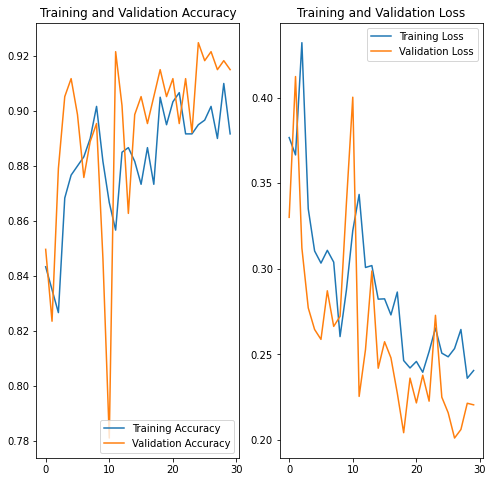

In [35]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [36]:
model.evaluate(val_data_gen)

4/4 [==============================] - 6s 1s/step - loss: 0.2204 - accuracy: 0.9150


[0.22044280171394348, 0.915032684803009]

In [37]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten
from tensorflow.keras.layers import Dense
import numpy as np
from itertools import cycle

from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from scipy import interp
from sklearn.metrics import roc_auc_score

from google.colab import files
from keras.preprocessing import image

In [38]:
train_faces_names = os.listdir('/content/Dataset/Train/Non Mask')
#print(train_faces_names[:10])

train_masked_names = os.listdir('/content/Dataset/Train/Mask')
#print(train_masked_names[:10])

validation_faces_hames = os.listdir('/content/Dataset/Validation/Non Mask')
#print(validation_faces_hames[:10])

validation_masked_names = os.listdir('/content/Dataset/Validation/Mask')
#print(validation_masked_names[:10])

In [39]:
# Directory with our training faces pictures
train_faces_dir = os.path.join('/content/Dataset/Train/Non Mask')

# Directory with our training masked pictures
train_masked_dir = os.path.join('/content/Dataset/Train/Mask')

# Directory with our validation faces pictures
valid_faces_dir = os.path.join('/content/Dataset/Validation/Non Mask')

# Directory with our validation masked pictures
valid_masked_dir = os.path.join('/content/Dataset/Validation/Mask')

In [40]:
print('total training faces images:', len(os.listdir(train_faces_dir)))
print('total training masked images:', len(os.listdir(train_masked_dir)))
print('total validation faces images:', len(os.listdir(valid_faces_dir)))
print('total validation masked images:', len(os.listdir(valid_masked_dir)))

%matplotlib inline

# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

total training faces images: 300
total training masked images: 300
total validation faces images: 153
total validation masked images: 153


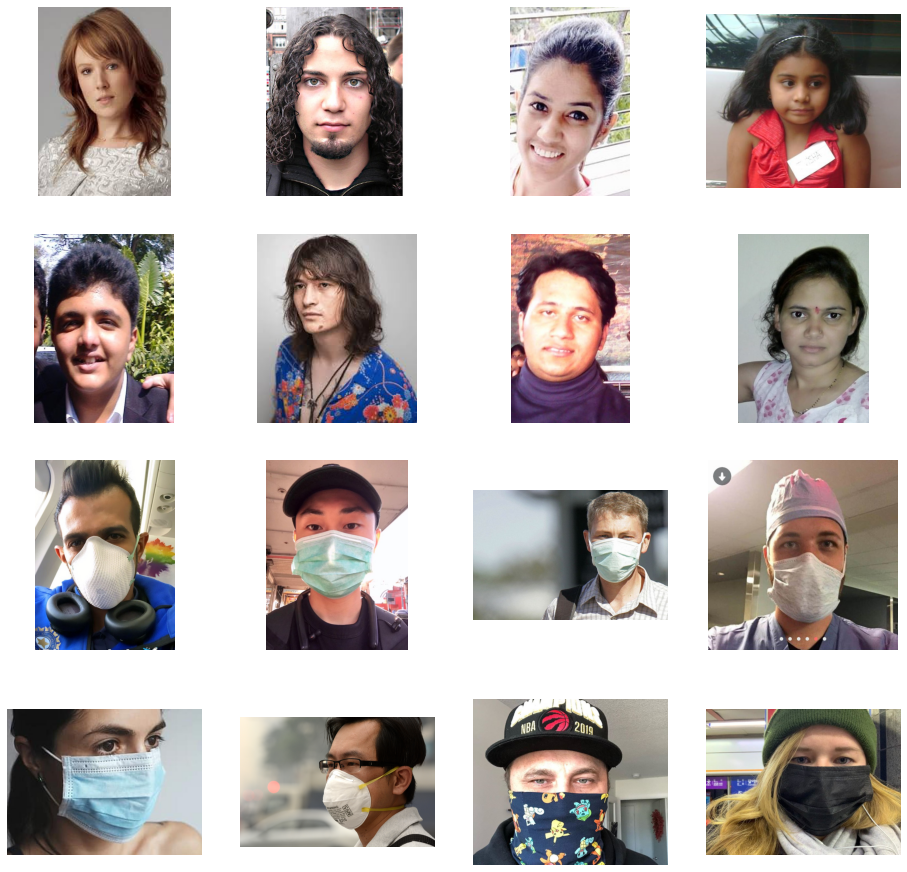

In [41]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_faces_pic = [os.path.join(train_faces_dir, fname) 
                for fname in train_faces_names[pic_index-8:pic_index]]
next_masked_pic = [os.path.join(train_masked_dir, fname) 
                for fname in train_masked_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_faces_pic + next_masked_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [42]:
# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/Dataset/Train/',  # This is the source directory for training images
        classes = ['Non Mask', 'Mask'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=100,
        # Use binary labels
        class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/Dataset/Validation/',  # This is the source directory for training images
        classes = ['Non Mask', 'Mask'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=19,
        # Use binary labels
        class_mode='binary',
        shuffle=False)

Found 600 images belonging to 2 classes.
Found 306 images belonging to 2 classes.


In [43]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False

9420800/9406464 [==============================] - 0s 0us/step


In [44]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d (G  (None, 1280)             0         
 lobalAveragePooling2D)                                          
                                                                 
 dense_2 (Dense)             (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [45]:
from tensorflow.keras.optimizers import RMSprop

# model.compile(loss='binary_crossentropy',
#               optimizer=RMSprop(lr=0.001),
#               metrics=['accuracy', tf.keras.metrics.AUC()])

from tensorflow.keras import optimizers


model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [46]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,  
      epochs=15,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
6/6 [==============================] - 13s 2s/step - loss: 1.5455 - accuracy: 0.7500 - val_loss: 0.1984 - val_accuracy: 0.9474
Epoch 2/15
6/6 [==============================] - 9s 2s/step - loss: 0.1278 - accuracy: 0.9550 - val_loss: 0.1239 - val_accuracy: 0.9671
Epoch 3/15
6/6 [==============================] - 10s 2s/step - loss: 0.0603 - accuracy: 0.9817 - val_loss: 0.1059 - val_accuracy: 0.9737
Epoch 4/15
6/6 [==============================] - 9s 2s/step - loss: 0.0468 - accuracy: 0.9850 - val_loss: 0.2127 - val_accuracy: 0.9276
Epoch 5/15
6/6 [==============================] - 9s 2s/step - loss: 0.1416 - accuracy: 0.9433 - val_loss: 2.3350 - val_accuracy: 0.5526
Epoch 6/15
6/6 [==============================] - 9s 2s/step - loss: 0.3219 - accuracy: 0.9167 - val_loss: 0.1552 - val_accuracy: 0.9474
Epoch 7/15
6/6 [==============================] - 9s 1s/step - loss: 0.0120 - accuracy: 0.9967 - val_loss: 0.3029 - val_accuracy: 0.9079
Epoch 8/15
6/6 [=======================

In [47]:
model.evaluate(validation_generator)

17/17 [==============================] - 9s 554ms/step - loss: 0.2609 - accuracy: 0.9346


[0.2609427869319916, 0.9346405267715454]

In [48]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,
                      verbose=1)

17/17 [==============================] - 6s 319ms/step


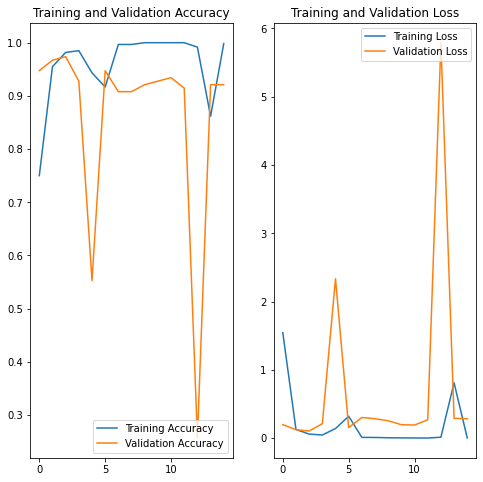

In [49]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(15)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

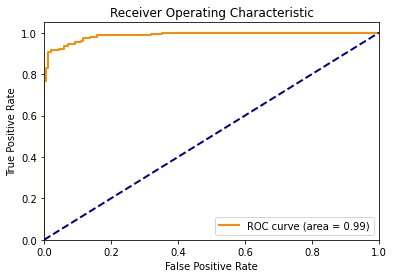

In [50]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

roc_auc = auc(fpr, tpr)

plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

Saving 001.jpg to 001.jpg
[0.9744253]
001.jpg is a masked face


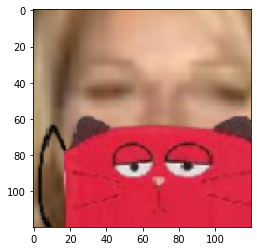

In [52]:
%matplotlib inline

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(120, 120))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])

  if classes[0]<0.5:
    print(fn + " is a nonmasked face")
  else:
    print(fn + " is a masked face")

Part2 Detecting Male and Female with Mask

In [223]:
%cp -R /content/drive/MyDrive/MaskedMenWomenDataset/ /content/

In [224]:
!ls "/content/MaskedMenWomenDataset"

Train  Validation


In [225]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import os
import matplotlib.pyplot as plt
import numpy as np
import logging
logger = tf.get_logger()
logger.setLevel(logging.ERROR)

In [226]:
num_male_tr = len(os.listdir('/content/MaskedMenWomenDataset/Train/Men'))
num_female_tr = len(os.listdir('/content/MaskedMenWomenDataset/Train/Women'))

num_male_val = len(os.listdir('/content/MaskedMenWomenDataset/Validation/Men'))
num_female_val = len(os.listdir('/content/MaskedMenWomenDataset/Validation/Women'))

total_train = num_male_tr + num_female_tr
total_val = num_male_val + num_female_val

In [227]:
print('total training Men images:', num_male_tr)
print('total training Women images:', num_female_tr)

print('total validation Men images:', num_male_val)
print('total validation Women images:', num_female_val)
print("--")
print("Total training images:", total_train)
print("Total validation images:", total_val)

total training Men images: 1099
total training Women images: 1100
total validation Men images: 1026
total validation Women images: 1025
--
Total training images: 2199
Total validation images: 2051


In [229]:
BATCH_SIZE = 100 # Number of training examples to process before updating our models variables
IMG_SHAPE  = 120  # Our training data consists of images with width of 150 pixels and height of 150 pixels

In [230]:
train_image_generator      = ImageDataGenerator(rescale=1./255)  # Generator for our training data
validation_image_generator = ImageDataGenerator(rescale=1./255)  # Generator for our validation data

In [231]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
                                                           directory='/content/MaskedMenWomenDataset/Train',
                                                           shuffle=True,
                                                           target_size=(IMG_SHAPE,IMG_SHAPE), #(120,120)
                                                           class_mode='binary')

Found 2197 images belonging to 2 classes.


In [232]:
val_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE2,
                                                              directory='/content/MaskedMenWomenDataset/Validation',
                                                              shuffle=False,
                                                              target_size=(IMG_SHAPE,IMG_SHAPE), #(150,150)
                                                              class_mode='binary')

Found 2049 images belonging to 2 classes.


In [233]:
sample_training_images, _ = next(train_data_gen) 

In [234]:
# This function will plot images in the form of a grid with 1 row and 5 columns where images are placed in each column.
def plotImages(images_arr):
    fig, axes = plt.subplots(1, 5, figsize=(20,20))
    axes = axes.flatten()
    for img, ax in zip(images_arr, axes):
        ax.imshow(img)
    plt.tight_layout()
    plt.show()

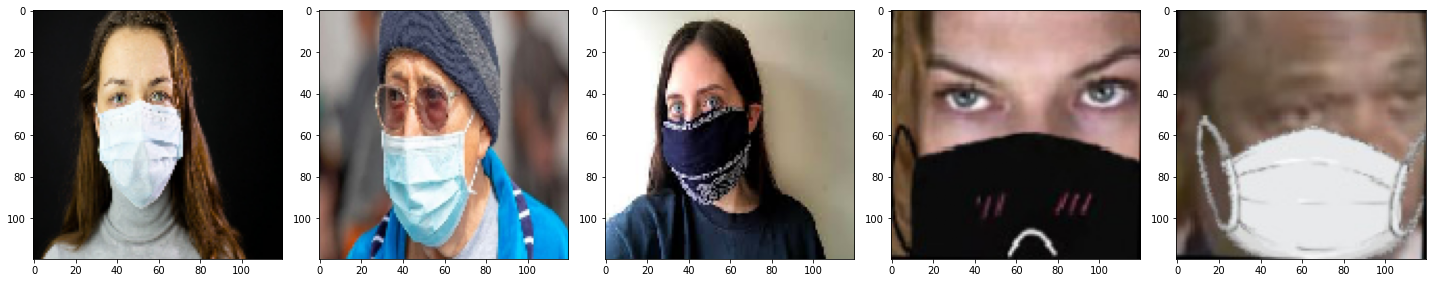

In [235]:
plotImages(sample_training_images[:5])  # Plot images 0-4

In [237]:
image_gen = ImageDataGenerator(rescale=1./255, horizontal_flip=True)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/MaskedMenWomenDataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE,IMG_SHAPE))

Found 2197 images belonging to 2 classes.


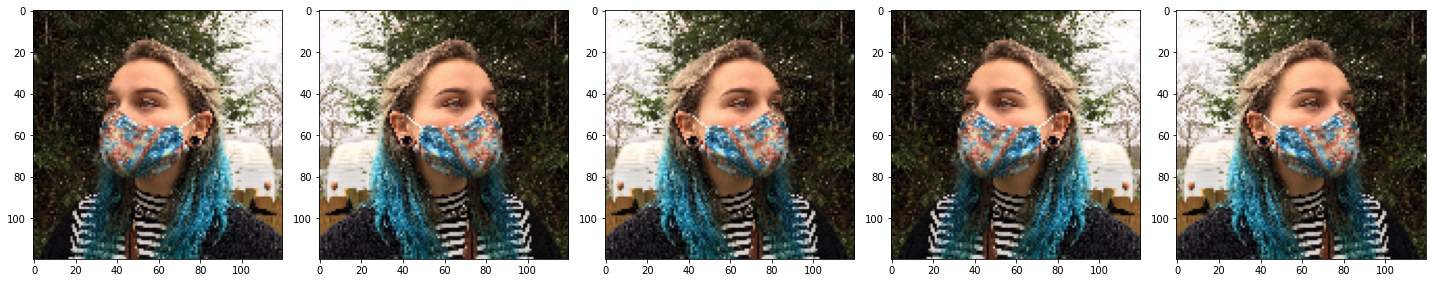

In [238]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [239]:
#Rotation
image_gen = ImageDataGenerator(rescale=1./255, rotation_range=45)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/MaskedMenWomenDataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2197 images belonging to 2 classes.


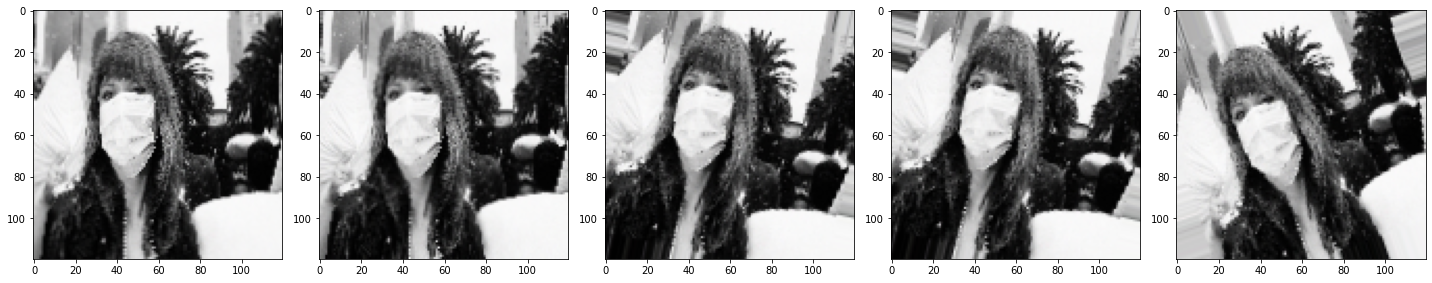

In [240]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [241]:
#Zooming
image_gen = ImageDataGenerator(rescale=1./255, zoom_range=0.5)

train_data_gen = image_gen.flow_from_directory(batch_size=BATCH_SIZE,
                                               directory='/content/MaskedMenWomenDataset/Train',
                                               shuffle=True,
                                               target_size=(IMG_SHAPE, IMG_SHAPE))

Found 2197 images belonging to 2 classes.


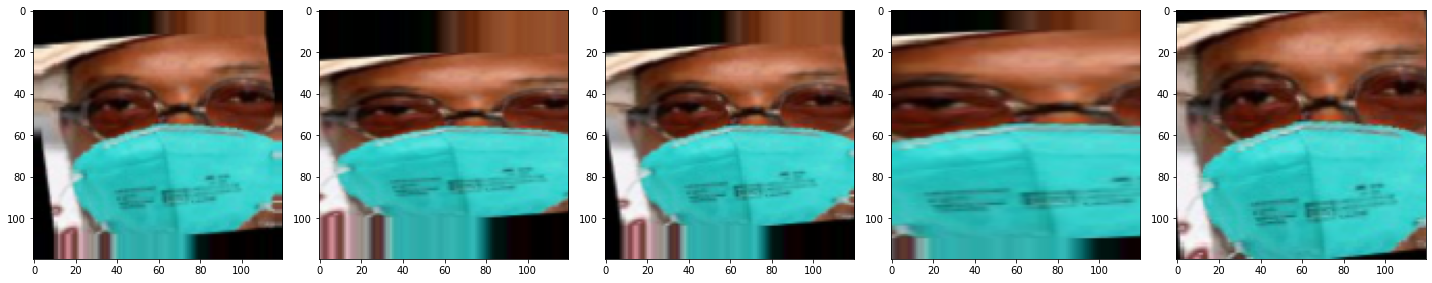

In [242]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [243]:
image_gen_train = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
                                                     directory='/content/MaskedMenWomenDataset/Train',
                                                     shuffle=True,
                                                     target_size=(IMG_SHAPE,IMG_SHAPE),
                                                     class_mode='binary')

Found 2197 images belonging to 2 classes.


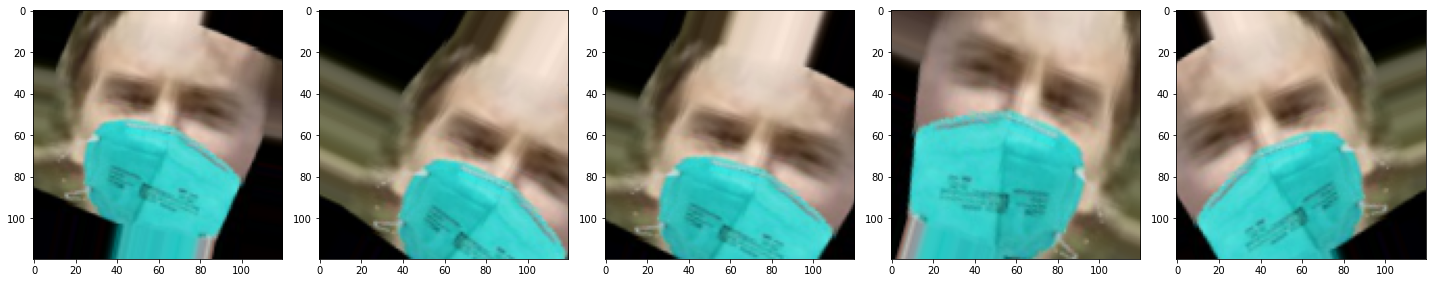

In [244]:
augmented_images = [train_data_gen[0][0][0] for i in range(5)]
plotImages(augmented_images)

In [245]:
image_gen_val = ImageDataGenerator(rescale=1./255)
val_data_gen = image_gen_val.flow_from_directory(batch_size=BATCH_SIZE,
                                                 directory='/content/MaskedMenWomenDataset/Validation',
                                                 target_size=(IMG_SHAPE, IMG_SHAPE),
                                                 class_mode='binary')

Found 2049 images belonging to 2 classes.


In [246]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(120, 120, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),

    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(2)
    #tf.keras.layers.Dense(2, activation='softmax')
    #tf.keras.layers.Dense(1, activation='sigmoid')
])

In [247]:
#from tensorflow.keras.optimizers import SGD
#opt = SGD(lr=0.01)
model.compile(optimizer='adam',
             loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
             #loss = 'categorical_crossentropy', 
             #optimizers = opt,
              metrics=['accuracy'])
#model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#sigmoid

In [248]:
model.summary()

Model: "sequential_8"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_24 (Conv2D)          (None, 118, 118, 32)      896       
                                                                 
 max_pooling2d_24 (MaxPoolin  (None, 59, 59, 32)       0         
 g2D)                                                            
                                                                 
 conv2d_25 (Conv2D)          (None, 57, 57, 64)        18496     
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 28, 28, 64)       0         
 g2D)                                                            
                                                                 
 conv2d_26 (Conv2D)          (None, 26, 26, 128)       73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 13, 13, 128)     

In [251]:
EPOCHS = 30

history = model.fit_generator(
    train_data_gen,
    steps_per_epoch= 5, #int(np.ceil(total_train / float(BATCH_SIZE))),
    epochs=EPOCHS,
    validation_data=val_data_gen,
    validation_steps= int(np.ceil(total_val / float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:8: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  


Epoch 1/30
5/5 [==============================] - 28s 6s/step - loss: 0.6904 - accuracy: 0.5332 - val_loss: 0.6827 - val_accuracy: 0.6057
Epoch 2/30
5/5 [==============================] - 27s 6s/step - loss: 0.6855 - accuracy: 0.4980 - val_loss: 0.6672 - val_accuracy: 0.5949
Epoch 3/30
5/5 [==============================] - 26s 6s/step - loss: 0.6691 - accuracy: 0.6177 - val_loss: 0.6330 - val_accuracy: 0.6452
Epoch 4/30
5/5 [==============================] - 28s 6s/step - loss: 0.6682 - accuracy: 0.6020 - val_loss: 0.6464 - val_accuracy: 0.6232
Epoch 5/30
5/5 [==============================] - 26s 6s/step - loss: 0.6634 - accuracy: 0.6040 - val_loss: 0.6732 - val_accuracy: 0.5539
Epoch 6/30
5/5 [==============================] - 26s 6s/step - loss: 0.6786 - accuracy: 0.5640 - val_loss: 0.6364 - val_accuracy: 0.6467
Epoch 7/30
5/5 [==============================] - 26s 6s/step - loss: 0.6393 - accuracy: 0.6700 - val_loss: 0.6071 - val_accuracy: 0.7023
Epoch 8/30
5/5 [==================

In [252]:
#model.evaluate(validation_generator)
model.evaluate(val_data_gen)

21/21 [==============================] - 14s 635ms/step - loss: 0.5083 - accuracy: 0.7648


[0.5083251595497131, 0.7647632956504822]

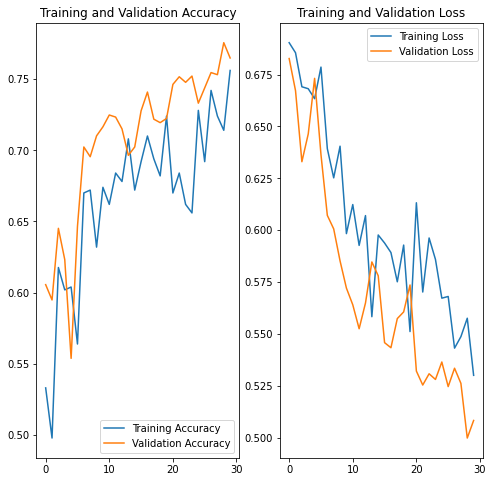

In [253]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(EPOCHS)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Show GPU Usage

In [254]:
#show GPU info
tf.test.gpu_device_name()
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 6583160770968252942
 xla_global_id: -1]

**Women/Men with Mask Classification by Applying Transfer Learning**

In [255]:
train_male_names = os.listdir('/content/MaskedMenWomenDataset/Train/Men')
print(train_male_names[:10])

train_female_names = os.listdir('/content/MaskedMenWomenDataset/Train/Women')
print(train_female_names[:10])

validation_male_hames = os.listdir('/content/MaskedMenWomenDataset/Validation/Men')
print(validation_male_hames[:10])

validation_female_names = os.listdir('/content/MaskedMenWomenDataset/Validation/Women')
print(validation_female_names[:10])

['0166.jpg', '508.jpg', '528.jpg', '171(1).jpg', '335.jpg', '340.jpg', '0211.jpg', '361.jpg', '429.jpg', 'masked (1390).jpg']
['648.jpg', '508.jpg', '528.jpg', '642.jpg', '377-with-mask.jpg', '694.jpg', '335.jpg', '340.jpg', '361.jpg', 'Megan_Mullally_0002.jpg']
['0166.jpg', '074(1).jpg', '171(1).jpg', '010.jpg', '335.jpg', '340.jpg', '0211.jpg', '361.jpg', '023 (1).jpg', '429.jpg']
['648.jpg', '508.jpg', '528.jpg', '642.jpg', '010.jpg', '377-with-mask.jpg', '694.jpg', '335.jpg', '340.jpg', '361.jpg']


In [256]:
train_male_dir = os.path.join('/content/MaskedMenWomenDataset/Train/Men')

# Directory with our training female pictures
train_female_dir = os.path.join('/content/MaskedMenWomenDataset/Train/Women')

# Directory with our validation male pictures
valid_male_dir = os.path.join('/content/MaskedMenWomenDataset/Validation/Men')

# Directory with our validation female pictures
valid_female_dir = os.path.join('/content/MaskedMenWomenDataset/Validation/Women')

In [257]:
print('total training male images:', len(os.listdir(train_male_dir)))
print('total training female images:', len(os.listdir(train_female_dir)))
print('total validation male images:', len(os.listdir(valid_male_dir)))
print('total validation female images:', len(os.listdir(valid_female_dir)))

total training male images: 1099
total training female images: 1100
total validation male images: 1026
total validation female images: 1025


In [258]:
%matplotlib inline


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

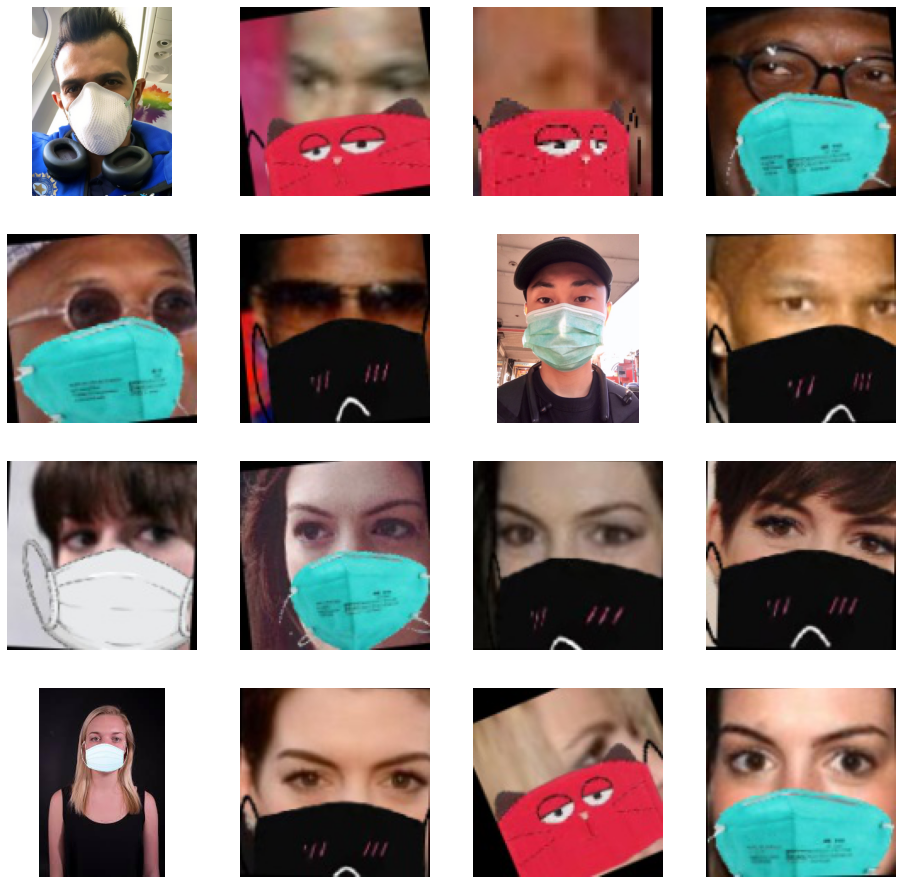

In [259]:
# Set up matplotlib fig, and size it to fit 4x4 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 8
next_male_pic = [os.path.join(train_male_dir, fname) 
                for fname in train_male_names[pic_index-8:pic_index]]
next_female_pic = [os.path.join(train_female_dir, fname) 
                for fname in train_female_names[pic_index-8:pic_index]]

for i, img_path in enumerate(next_male_pic + next_female_pic):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [260]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)
validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/MaskedMenWomenDataset/Train/',  # This is the source directory for training images
        classes = ['Men', 'Women'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=32,
        # Use binary labels
        class_mode='binary',
        shuffle=True)

#image_gen_train = ImageDataGenerator(
#      rescale=1./255,
#      rotation_range=40,
#      width_shift_range=0.2,
#      height_shift_range=0.2,
#      shear_range=0.2,
#      zoom_range=0.2,
#      horizontal_flip=True,
 #     fill_mode='nearest')

#train_data_gen = image_gen_train.flow_from_directory(batch_size=BATCH_SIZE,
 #                                                    directory='/content/Women_Men_Dataset/Train',
 #                                                    shuffle=True,
 #                                                    target_size=(IMG_SHAPE,IMG_SHAPE),
  #                                                   class_mode='binary')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/MaskedMenWomenDataset/Validation/',  # This is the source directory for training images
        classes = ['Men', 'Women'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=8,
        # Use binary labels
        class_mode='binary',
        shuffle=True)

Found 2197 images belonging to 2 classes.
Found 2049 images belonging to 2 classes.


In [261]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
#model.add(tf.keras.layers.Flatten())
#model.add(tf.keras.layers.Dense(128, activation='relu'))
#model.add(tf.keras.layers.Dropout(0.5))
model.add(Dense(1, activation = 'sigmoid'))
model.layers[0].trainable = False


In [262]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='binary_crossentropy',
               optimizer=RMSprop(lr=0.001),
               metrics=['accuracy'])

from tensorflow.keras import optimizers


#model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [263]:
model.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_2   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_16 (Dense)            (None, 1)                 1281      
                                                                 
Total params: 2,259,265
Trainable params: 1,281
Non-trainable params: 2,257,984
_________________________________________________________________


In [264]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,  
      epochs= 30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=validation_generator.n//validation_generator.batch_size)

Epoch 1/30
68/68 [==============================] - 37s 506ms/step - loss: 0.6537 - accuracy: 0.6628 - val_loss: 0.4979 - val_accuracy: 0.7593
Epoch 2/30
68/68 [==============================] - 33s 489ms/step - loss: 0.4899 - accuracy: 0.7649 - val_loss: 0.5138 - val_accuracy: 0.7563
Epoch 3/30
68/68 [==============================] - 33s 493ms/step - loss: 0.4383 - accuracy: 0.7861 - val_loss: 0.4065 - val_accuracy: 0.8110
Epoch 4/30
68/68 [==============================] - 34s 496ms/step - loss: 0.4051 - accuracy: 0.8092 - val_loss: 0.3915 - val_accuracy: 0.8237
Epoch 5/30
68/68 [==============================] - 33s 492ms/step - loss: 0.3833 - accuracy: 0.8273 - val_loss: 0.3638 - val_accuracy: 0.8438
Epoch 6/30
68/68 [==============================] - 33s 487ms/step - loss: 0.3624 - accuracy: 0.8397 - val_loss: 0.3629 - val_accuracy: 0.8389
Epoch 7/30
68/68 [==============================] - 33s 491ms/step - loss: 0.3421 - accuracy: 0.8513 - val_loss: 0.3409 - val_accuracy: 0.8584

In [267]:
model.evaluate(validation_generator)

257/257 [==============================] - 19s 73ms/step - loss: 0.2935 - accuracy: 0.8780


[0.2934781014919281, 0.8779892921447754]

In [268]:
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
preds = model.predict(validation_generator,verbose=1)


257/257 [==============================] - 18s 65ms/step


In [269]:
fpr, tpr, _ = roc_curve(validation_generator.classes, preds)

In [270]:
roc_auc = auc(fpr, tpr)

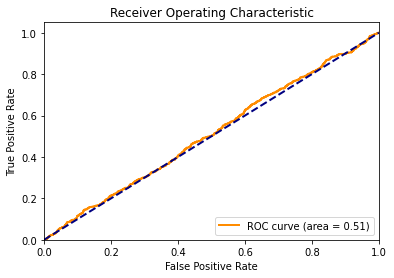

In [271]:
plt.figure()
lw = 2
plt.plot(fpr, tpr, color='darkorange',
         lw=lw, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

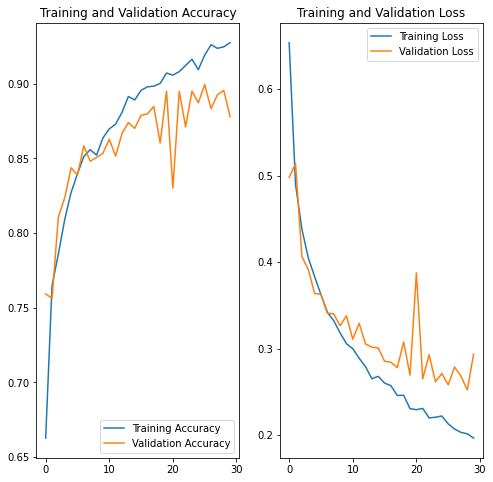

In [272]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

Saving 0-with-mask.jpg to 0-with-mask.jpg
[0.7223946]
0-with-mask.jpg is a masked man


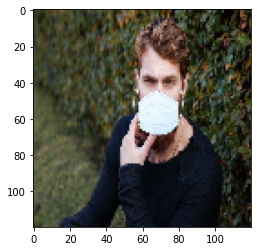

In [278]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image

uploaded = files.upload()

for fn in uploaded.keys():
 
  # predicting images
  path = '/content/' + fn
  img = image.load_img(path, target_size=(120, 120))
  x = image.img_to_array(img)
  plt.imshow(x/255.)
  x = np.expand_dims(x, axis=0)
  images = np.vstack([x])
  classes = model.predict(images, batch_size=10)
  print(classes[0])
  if classes[0]<0.75:
    print(fn + " is a masked man")
  else:
    print(fn + " is a masked woman")

**Face Recognition**

In [279]:
%cp -R /content/drive/MyDrive/FaceRecognitionDataset// /content/


In [280]:
import os

In [291]:
train_powell_names = os.listdir('/content/FaceRecognitionDataset/Train/Colin_Powell')
train_rumsfeld_names = os.listdir('/content/FaceRecognitionDataset/Train/Donald_Rumsfeld')
train_schoreder_names = os.listdir('/content/FaceRecognitionDataset/Train/Gerhard_Schroeder')
train_clinton_names = os.listdir('/content/FaceRecognitionDataset/Train/Hillary_Clinton')
train_capriati_names = os.listdir('/content/FaceRecognitionDataset/Train/Jennifer_Capriati')

In [330]:
%cd /content/drive/MyDrive/FaceRecognitionDataset

/content/drive/MyDrive/FaceRecognitionDataset


In [331]:
%ls /content/drive/MyDrive/FaceRecognitionDataset/Validation

Colin_Powell/     Gerhard_Schroeder/  Jennifer_Capriati/
Donald_Rumsfeld/  Hillary_Clinton/


In [332]:
valid_powell_names = os.listdir('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Colin_Powell')
valid_rumsfeld_names = os.listdir('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Donald_Rumsfeld')
valid_schoreder_names = os.listdir('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Gerhard_Schroeder')
valid_clinton_names = os.listdir('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Hillary_Clinton')
valid_capriati_names = os.listdir('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Jennifer_Capriati')

In [333]:
train_powell = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Train/Colin_Powell')
train_rumsfeld = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Train/Donald_Rumsfeld')
train_schoreder = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Train/Gerhard_Schroeder')
train_clinton = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Train/Hillary_Clinton')
train_capriati = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Train/Jennifer_Capriati')

In [334]:
valid_powell = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Colin_Powell')
valid_rumsfeld = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Donald_Rumsfeld')
valid_schoreder = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Gerhard_Schroeder')
valid_clinton = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Hillary_Clinton')
valid_capriati = os.path.join('/content/drive/MyDrive/FaceRecognitionDataset/Validation/Jennifer_Capriati')

In [335]:
print('total training powell images:', len(os.listdir(train_powell)))
print('total training rumsfeld images:', len(os.listdir(train_rumsfeld)))
print('total training schoreder images:', len(os.listdir(train_schoreder)))
print('total training clinton images:', len(os.listdir(train_clinton)))
print('total training capriati images:', len(os.listdir(train_capriati)))
print('----')
print('total validation powell images:', len(os.listdir(valid_powell)))
print('total validation rumsfeld images:', len(os.listdir(valid_rumsfeld)))
print('total validation schoreder images:', len(os.listdir(valid_schoreder)))
print('total validation clinton images:', len(os.listdir(valid_clinton)))
print('total validation capriati images:', len(os.listdir(valid_capriati)))

total training powell images: 215
total training rumsfeld images: 292
total training schoreder images: 206
total training clinton images: 200
total training capriati images: 198
----
total validation powell images: 106
total validation rumsfeld images: 107
total validation schoreder images: 106
total validation clinton images: 106
total validation capriati images: 114


In [336]:
%matplotlib inline


# Parameters for our graph; we'll output images in a 4x4 configuration
nrows = 4
ncols = 4

# Index for iterating over images
pic_index = 0

0 /content/drive/MyDrive/FaceRecognitionDataset/Train/Donald_Rumsfeld/Donald_Rumsfeld_0011.jpg
1 /content/drive/MyDrive/FaceRecognitionDataset/Train/Donald_Rumsfeld/Donald_Rumsfeld_0069.jpg
2 /content/drive/MyDrive/FaceRecognitionDataset/Train/Donald_Rumsfeld/Donald_Rumsfeld_0015.jpg
3 /content/drive/MyDrive/FaceRecognitionDataset/Train/Donald_Rumsfeld/Donald_Rumsfeld_0006.jpg
4 /content/drive/MyDrive/FaceRecognitionDataset/Train/Colin_Powell/Colin_Powell_0181.jpg
5 /content/drive/MyDrive/FaceRecognitionDataset/Train/Colin_Powell/Colin_Powell_0161.jpg
6 /content/drive/MyDrive/FaceRecognitionDataset/Train/Colin_Powell/Colin_Powell_0150.jpg
7 /content/drive/MyDrive/FaceRecognitionDataset/Train/Colin_Powell/Colin_Powell_0074.jpg


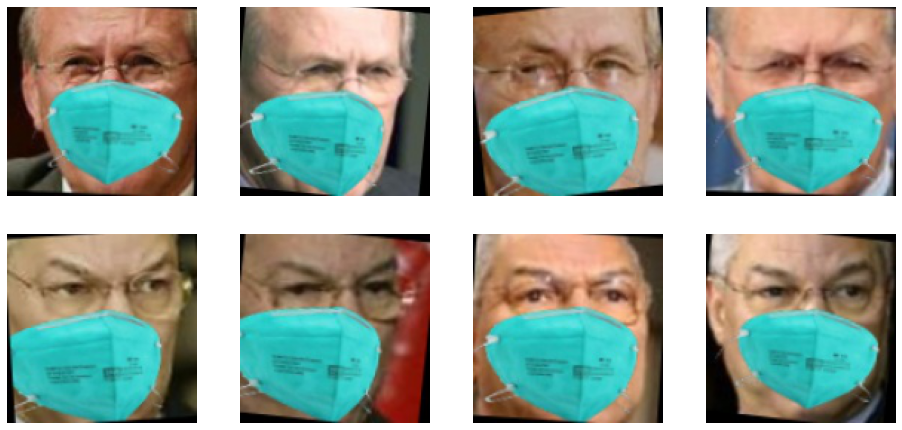

In [337]:
# Set up matplotlib fig, and size it to fit 2x2 pics
fig = plt.gcf()
fig.set_size_inches(ncols * 4, nrows * 4)

pic_index += 4
next_powell_pic = [os.path.join(train_powell, fname) 
                for fname in train_powell_names[pic_index-4:pic_index]]
next_rumsfeld_pic = [os.path.join(train_rumsfeld, fname) 
                for fname in train_rumsfeld_names[pic_index-4:pic_index]]
next_schoreder_pic = [os.path.join(train_schoreder, fname) 
                for fname in train_schoreder_names[pic_index-4:pic_index]]
next_clinton_pic = [os.path.join(train_clinton, fname) 
                for fname in train_clinton_names[pic_index-4:pic_index]]
next_capriati_pic = [os.path.join(train_capriati, fname) 
                for fname in train_capriati_names[pic_index-4:pic_index]]


for i, img_path in enumerate(next_rumsfeld_pic + next_powell_pic):
  print(i,img_path)
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)
  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

In [339]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1/255)

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 120 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '/content/FaceRecognitionDataset/Train/',  # This is the source directory for training images
        classes = ['Colin_Powell','Donald_Rumsfeld','Gerhard_Schroeder','Hillary_Clinton','Jennifer_Capriati'],        
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=16,
        # Use binary labels
        class_mode='categorical')

# Flow validation images in batches of 19 using valid_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '/content/FaceRecognitionDataset/Validation/',  # This is the source directory for training images
        classes = ['Colin_Powell','Donald_Rumsfeld','Gerhard_Schroeder','Hillary_Clinton','Jennifer_Capriati'],
        target_size=(120, 120),  # All images will be resized to 200x200
        batch_size=8,
        # Use binary labels
        class_mode='categorical',
        shuffle=True)

Found 1106 images belonging to 5 classes.
Found 104 images belonging to 5 classes.


In [340]:
model = Sequential()
model.add(MobileNetV2(include_top = False, weights="imagenet", input_shape=(120, 120, 3)))
model.add(tf.keras.layers.GlobalAveragePooling2D())
model.add(Dense(5, activation = 'softmax'))
model.layers[0].trainable = False


In [341]:
model.summary()

Model: "sequential_11"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 mobilenetv2_1.00_224 (Funct  (None, 4, 4, 1280)       2257984   
 ional)                                                          
                                                                 
 global_average_pooling2d_4   (None, 1280)             0         
 (GlobalAveragePooling2D)                                        
                                                                 
 dense_18 (Dense)            (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [342]:
from tensorflow.keras.optimizers import RMSprop

model.compile(loss='categorical_crossentropy',
               optimizer=RMSprop(lr=0.001),
               metrics=['accuracy'])

from tensorflow.keras import optimizers


#model.compile(optimizer=RMSprop(lr=0.01), loss = 'binary_crossentropy', metrics = 'accuracy')

/usr/local/lib/python3.7/dist-packages/keras/optimizer_v2/rmsprop.py:130: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(RMSprop, self).__init__(name, **kwargs)


In [343]:
history = model.fit(
      train_generator,
      steps_per_epoch=train_generator.n//train_generator.batch_size,  
      epochs=30,
      verbose=1,
      validation_data = validation_generator,
      validation_steps = validation_generator.n//validation_generator.batch_size
      )

Epoch 1/30
69/69 [==============================] - 20s 246ms/step - loss: 1.3300 - accuracy: 0.4872 - val_loss: 1.2892 - val_accuracy: 0.4712
Epoch 2/30
69/69 [==============================] - 16s 225ms/step - loss: 0.7493 - accuracy: 0.7055 - val_loss: 1.2440 - val_accuracy: 0.5577
Epoch 3/30
69/69 [==============================] - 16s 224ms/step - loss: 0.5420 - accuracy: 0.7936 - val_loss: 1.1662 - val_accuracy: 0.5577
Epoch 4/30
69/69 [==============================] - 16s 226ms/step - loss: 0.4421 - accuracy: 0.8330 - val_loss: 1.0696 - val_accuracy: 0.6058
Epoch 5/30
69/69 [==============================] - 16s 226ms/step - loss: 0.3470 - accuracy: 0.8798 - val_loss: 1.0158 - val_accuracy: 0.6538
Epoch 6/30
69/69 [==============================] - 16s 224ms/step - loss: 0.3144 - accuracy: 0.8844 - val_loss: 0.9689 - val_accuracy: 0.6538
Epoch 7/30
69/69 [==============================] - 16s 228ms/step - loss: 0.2540 - accuracy: 0.9156 - val_loss: 1.0359 - val_accuracy: 0.6154

In [344]:
model.evaluate(validation_generator)

13/13 [==============================] - 1s 107ms/step - loss: 1.1763 - accuracy: 0.6827


[1.1762855052947998, 0.682692289352417]

masked Clinton


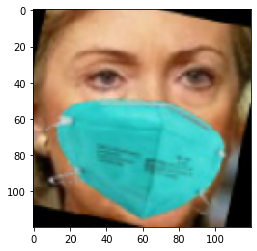

In [345]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image


x_batch, y_batch = validation_generator.next()
img = x_batch[0]
plt.imshow(img)
img = np.expand_dims(img, axis=0)
images = np.vstack([img])
classes = model.predict(images, batch_size=10)
x = np.argmax(classes, axis = 1)
if x[0] == 0:
  print("masked Powell")
elif x == 1:
  print("masked Rumsfeld")
elif x == 2:
  print("masked Schoreder")
elif x == 3:
  print("masked Clinton")
elif x == 4:
  print("masked Capriati")

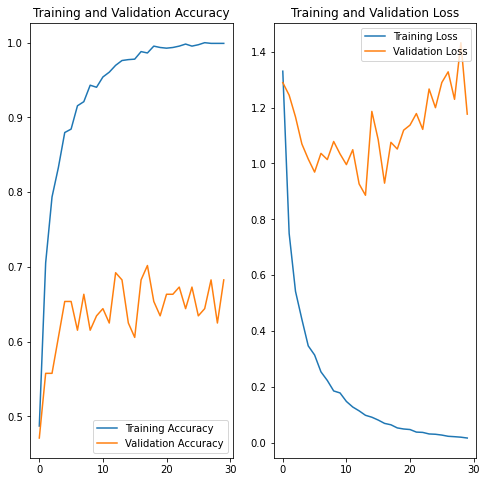

In [346]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

In [347]:
!pip install scikit-plot

13/13 [==============================] - 2s 105ms/step


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_roc_curve is deprecated; This will be removed in v0.5.0. Please use scikitplot.metrics.plot_roc instead.
  warnings.warn(msg, category=FutureWarning)


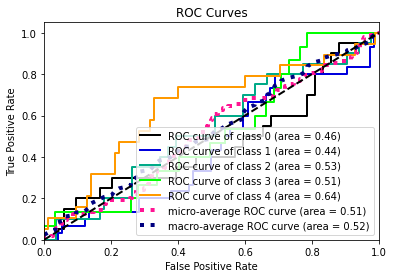

In [317]:
import sklearn.metrics as metrics
import scikitplot as skplt
import matplotlib.pyplot as plt
STEP_SIZE_TEST=validation_generator.n//validation_generator.batch_size
validation_generator.reset()
probs = model.predict(validation_generator,verbose=1)
skplt.metrics.plot_roc_curve(validation_generator.classes, probs)
plt.show()

VGG Model

In [348]:
from tensorflow.keras.applications.vgg16 import VGG16

In [349]:
from tensorflow.keras.datasets import mnist
from tensorflow.keras.layers import Conv2D, MaxPooling2D, AveragePooling2D
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras import optimizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [350]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   validation_split=0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)


train_data_dir = '/content/FaceRecognitionDataset/Train/'
valid_data_dir = '/content/FaceRecognitionDataset/Validation/'
training_set = train_datagen.flow_from_directory(train_data_dir,
                                                target_size = (120, 120),
                                                 batch_size = 16,
                                                class_mode = 'categorical')

validation_set = train_datagen.flow_from_directory(valid_data_dir,
                                                 target_size = (120, 120),
                                                 batch_size = 16,
                                                 class_mode = 'categorical')



STEP_SIZE_TRAIN=training_set.n//training_set.batch_size
STEP_SIZE_VALID=validation_set.n//validation_set.batch_size


Found 1106 images belonging to 5 classes.
Found 104 images belonging to 5 classes.


In [351]:
IMAGE_SIZE = [120, 120]
vgg = VGG16(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)
#here [3] denotes for RGB images(3 channels)

#don't train existing weights
for layer in vgg.layers:
 layer.trainable = False

for layer in vgg.layers:
  print(layer, layer.trainable)
 
# Create the model
model = Sequential()

# Add the vgg convolutional base model
model.add(vgg)

# Add new layers

x = Flatten()(vgg.output)
x=Dense(4096, activation='relu')(x)
x=Dense(4096, activation='relu')(x)
prediction = Dense(5, activation='softmax')(x)

model = Model(inputs=vgg.input, outputs=prediction)
model.compile(loss='categorical_crossentropy',
                    optimizer=optimizers.Adam(),
                    metrics=['accuracy'])
model.summary()


58900480/58889256 [==============================] - 0s 0us/step
<keras.engine.input_layer.InputLayer object at 0x7f4ceca5da90> False
<keras.layers.convolutional.Conv2D object at 0x7f4ce7bb3e90> False
<keras.layers.convolutional.Conv2D object at 0x7f4ce2856390> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4ce7bb3590> False
<keras.layers.convolutional.Conv2D object at 0x7f4ce7cb9110> False
<keras.layers.convolutional.Conv2D object at 0x7f4ce26b5690> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4ce235f8d0> False
<keras.layers.convolutional.Conv2D object at 0x7f4cebafae90> False
<keras.layers.convolutional.Conv2D object at 0x7f4ce787ac90> False
<keras.layers.convolutional.Conv2D object at 0x7f4ce2d9d350> False
<keras.layers.pooling.MaxPooling2D object at 0x7f4cece4b510> False
<keras.layers.convolutional.Conv2D object at 0x7f4cece6d7d0> False
<keras.layers.convolutional.Conv2D object at 0x7f4cea627050> False
<keras.layers.convolutional.Conv2D object at 0x7f4cecbfef90> F

In [352]:

from keras.callbacks import ModelCheckpoint, LearningRateScheduler
from keras.callbacks import ReduceLROnPlateau
lr_reducer = ReduceLROnPlateau(factor=np.sqrt(0.1),
                               cooldown=0,
                               patience=5,
                               min_lr=0.5e-6)
checkpoint = ModelCheckpoint(filepath='mymodel.h5', 
                               verbose=1, save_best_only=True)
callbacks = [checkpoint, lr_reducer]

history = model.fit_generator(training_set, 
                    steps_per_epoch=STEP_SIZE_TRAIN, 
                    epochs = 30, verbose=1, 
                    validation_data = validation_set, 
                    validation_steps = STEP_SIZE_VALID)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  app.launch_new_instance()


Epoch 1/30
69/69 [==============================] - 157s 2s/step - loss: 1.9712 - accuracy: 0.5376 - val_loss: 1.4618 - val_accuracy: 0.4792
Epoch 2/30
69/69 [==============================] - 150s 2s/step - loss: 0.6454 - accuracy: 0.7541 - val_loss: 1.6796 - val_accuracy: 0.5417
Epoch 3/30
69/69 [==============================] - 152s 2s/step - loss: 0.5433 - accuracy: 0.8000 - val_loss: 1.2702 - val_accuracy: 0.5312
Epoch 4/30
69/69 [==============================] - 153s 2s/step - loss: 0.4581 - accuracy: 0.8413 - val_loss: 1.2934 - val_accuracy: 0.5833
Epoch 5/30
69/69 [==============================] - 150s 2s/step - loss: 0.4862 - accuracy: 0.8266 - val_loss: 1.1707 - val_accuracy: 0.6250
Epoch 6/30
69/69 [==============================] - 149s 2s/step - loss: 0.3864 - accuracy: 0.8670 - val_loss: 1.0391 - val_accuracy: 0.6042
Epoch 7/30
69/69 [==============================] - 149s 2s/step - loss: 0.2931 - accuracy: 0.8945 - val_loss: 0.9067 - val_accuracy: 0.7396
Epoch 8/30
69

In [353]:
model.evaluate(validation_set)

7/7 [==============================] - 12s 2s/step - loss: 1.1867 - accuracy: 0.7596


[1.1866555213928223, 0.7596153616905212]

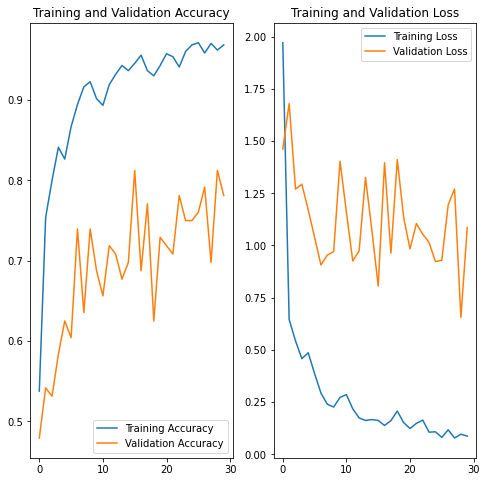

In [354]:
import matplotlib.pyplot as plt
#plt.plot(history.history["accuracy"])
#plt.plot(history.history['val_accuracy'])
#plt.plot(history.history['loss'])
#plt.plot(history.history['val_loss'])
#plt.title("model accuracy")
#plt.ylabel("Accuracy")
#plt.xlabel("Epoch")
#plt.legend(["Accuracy","Validation Accuracy","loss","Validation Loss"])
#plt.show()

epochs_range = range(30)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(30)

plt.figure(figsize=(8, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.savefig('./foo.png')
plt.show()

masked Capriati


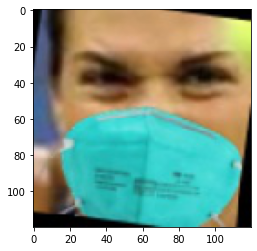

In [356]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from google.colab import files
from keras.preprocessing import image


x_batch, y_batch = validation_generator.next()
img = x_batch[0]
plt.imshow(img)
img = np.expand_dims(img, axis=0)
images = np.vstack([img])
classes = model.predict(images, batch_size=8)
x = np.argmax(classes, axis = 1)
if x[0] == 0:
  print("masked Powell")
elif x == 1:
  print("masked Rumsfeld")
elif x == 2:
  print("masked Schoreder")
elif x == 3:
  print("masked Clinton")
elif x == 4:
  print("masked Capriati")